# Import

## Library

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, rand_score
# PCA
from sklearn.decomposition import PCA
import warnings
# warnings.filterwarnings('ignore')
from sklearn import preprocessing


# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Model
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, auc
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

#Time
import time

##  Dataset

In [5]:
iris = pd.read_csv( 'iris.data' , names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'] )

In [6]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.shape

(150, 5)

In [9]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Pre-processing

## Define Feature and Target

In [10]:
x = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [11]:
y = iris[['Species']]
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Auto-Scaling

In [13]:
# Realizamos un autoscaling con los datos, para todas las features
scaler = StandardScaler().fit(x)
xscal = scaler.transform(x)

# Principal Component Analysis

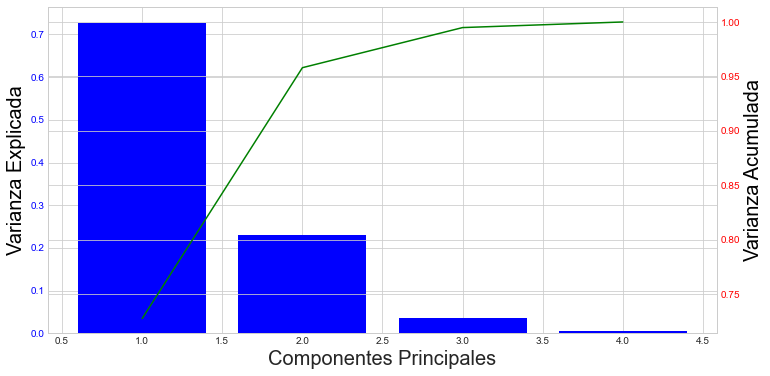

In [21]:
# Definimos la cantidad de componentes
n_comps = 4
components = range(1,n_comps + 1)
#Creamos el objeto PCA
pca = PCA(n_components=n_comps)

# Ajustamos
pca.fit(xscal)
# Transformamos
xpca = pca.transform(xscal)

# Porcentaje de la varianza explicada por cada Principal Component (PC)
eigenvalues = pca.explained_variance_ratio_

# Suma acumulada
eigenvalues_acum = pca.explained_variance_ratio_.cumsum() 

# Graficamos
# Eje Izquierdo
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Componentes Principales',fontsize=20)
ax1.set_ylabel('Varianza Explicada', color='k',fontsize=20)
ax1.bar(components, eigenvalues, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eje derecho
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Varianza Acumulada', color='k',fontsize=20) 
ax2.plot(components, eigenvalues_acum, color='green') 
ax2.tick_params(axis='y', labelcolor='red')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Cluster analysis

## K - Means without PCA

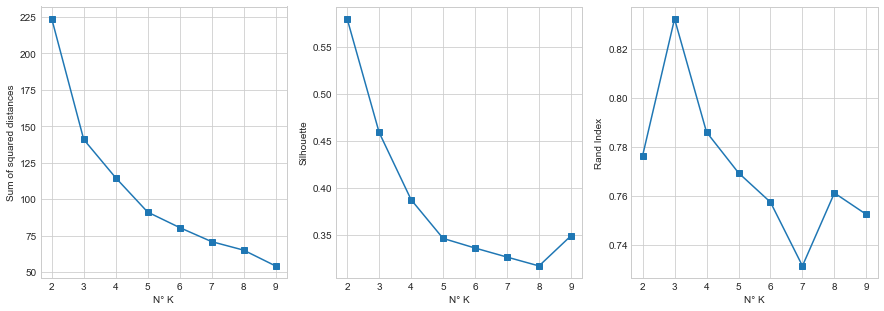

In [22]:
dist_cent = []
sil_list = []
rand_list = []
for k in range(2, 10):
    # Creamos el objecto de cluster y lo fiteamos en la misma linea utilizado xscal
    kmeans = KMeans(n_clusters=k, random_state=1).fit(xscal)
    centers_i = kmeans.cluster_centers_ # Centroide de cada cluster
    labels_i = kmeans.labels_ # Labels de cada muestra    
    # Silhouttte Score
    sil_score_i = silhouette_score(xscal,labels_i)
    sil_list.append(sil_score_i)        
    # Rand_Index
    rand_index_i = rand_score(y,labels_i)
    rand_list.append(rand_index_i)
    dist_cent.append(kmeans.inertia_)    
# Plot de metricas
fig, axs = plt.subplots(1,3,figsize=(15,5))    
axs[0].plot(range(2, 10), dist_cent, marker='s');
axs[0].set_xlabel('N° K')
axs[0].set_ylabel('Sum of squared distances')
# Silhoute plot
axs[1].plot(range(2, 10), sil_list, marker='s');
axs[1].set_xlabel('N° K')
axs[1].set_ylabel('Silhouette')
# Rand Index plot
axs[2].plot(range(2, 10), rand_list, marker='s');
axs[2].set_xlabel('N° K')
axs[2].set_ylabel('Rand Index')    
plt.show()


In [23]:
# Vamos a crear un dataframe para guardar los resultados
results_df = pd.DataFrame(columns=['Cluster','Rand_','Sil_'])

### Train KMeans with 2 clusters

In [24]:
kmeans2 = KMeans(n_clusters = 2, random_state = 10).fit(xscal)
# Silhouttte Score
sil_score = silhouette_score(xscal,kmeans2.labels_)
# Rand_Index
rand_index = rand_score(y,kmeans2.labels_)

#Save outcome
results_df = results_df.append({'Cluster':'Kmeans2 without pca',
                                'Rand_':rand_index,
                                'Sil_':sil_score},ignore_index=True)
results_df

,Cluster,Rand_,Sil_
0,Kmeans2 without pca,0.776286,0.580184


### Train KMeans with 3 clusters